In [205]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
datasets = ['Calligraphy','CIFAR-100']

accs = {'ResNet':{'Calligraphy':[0.04, .602, .835, .903, .909, .942, .952],
                 'CIFAR-100':[0.01, .677, .87, .905, .91, .911, .911]},
        'ViT':{'Calligraphy':[0.09, .93, .94, .96, .977, .98],
                 'CIFAR-100':[0.02, 0.93, 0.95, 0.96, 0.96, 0.97]},
        'Swin':{'Calligraphy':[0.09, .89, .93, .95, .97, .98],
                 'CIFAR-100':[0.01, 0.89, 0.93, 0.94, 0.96, 0.95]},
        'PViT':{'Calligraphy':[0.09, .88, .92, .94, .96, .98],
                 'CIFAR-100':[0.02, 0.88, .90, 0.90, 0.92, 0.92]},
        'PoolFormer':{'Calligraphy':[0.07, .92, .95, .97, .98, .99],
                 'CIFAR-100':[0.01, 0.86, 0.89, 0.92, 0.92, 0.92]},
        'CvT':{'Calligraphy':[0.1, .85, .94, .95, .97, .99],
                 'CIFAR-100':[0.00, 0.88, 0.91, 0.93, 0.94, 0.95]},
        'ConvNextV2':{'Calligraphy':[0.05, .95, .95, .97, .98, .99],
                 'CIFAR-100':[0.00, 0.91, 0.93, 0.94, 0.95, 0.96]},     
       }

In [203]:
modelnames = ['ResNet', 'ViT', 'Swin', 'PViT', 'PoolFormer', 'CvT', 'ConvNextV2']



#isCNN = True
metrics = ['NMI', 'NNk1', 'NNk500']

data_arrays = {modelname:{} for modelname in modelnames}
for modelname in modelnames:
    steps = list(range(0,500+1,100)) if modelname == 'ResNet' else list(range(0,400+1,100))
    for dataset in datasets:
        data_arrays[modelname][dataset] = {}
        for datatype in ['seen','unseen']:
            data_arrays[modelname][dataset][datatype] = {}
            for step in steps:

                with open(f'{dataset}_seen_unseen_data/{modelname}{dataset}/saved_embeds_step{step}_{datatype}.pkl','rb') as f:
                    data = pickle.load(f)


                methd = list(data.keys())[0]


                for metric in metrics:
                    layer_data = np.array([data[methd][layer_i][metric] for layer_i in data[methd]])
                    if step == 0:
                        data_arrays[modelname][dataset][datatype][metric] = layer_data[None,:]
                    else:
                        #concatenate 
                        data_arrays[modelname][dataset][datatype][metric] = np.concatenate([data_arrays[modelname][dataset][datatype][metric], layer_data[None,:]],axis=0)

                    

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


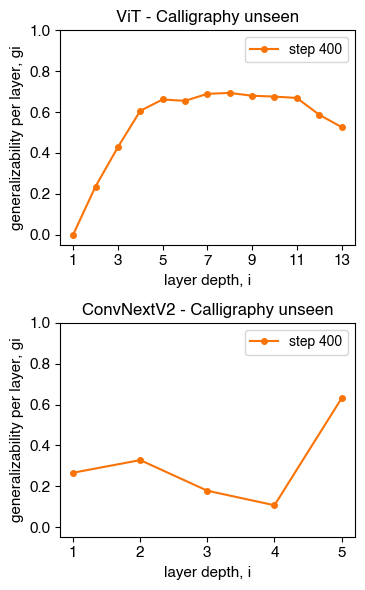

In [244]:
# COMPARING NMI and kNN across layers at end of fine-tuning (last step)

f, axes = plt.subplots(2,1,figsize=(5*.75,8*.75))
for ax,modelname in zip(axes,['ViT','ConvNextV2']):
    metrics_to_show = ['NMI']
    datatype = 'unseen'
    step_i = len(steps)-1 #last step
    labels_dict = {'NMI':'step 400', 'NNk500':'$g_i^{kNN}$', 'NNk1':'$g_i^{NN}$'}
    colors_dict = {'NMI':'xkcd:orange', 'NNk1':'xkcd:orange', 'NNk500':'magenta'}



    
    dataset = 'Calligraphy'

    for metric in metrics_to_show:
        ax.plot(data_arrays[modelname][dataset][datatype][metric][step_i], lw=1.5, marker='o', markersize=4, color=colors_dict[metric], label=labels_dict[metric])
    ax.set(xticks=range(data_arrays[modelname][dataset][datatype][metric].shape[1]))
    ax.set_xlabel('layer depth, i', size=LBLSZ)
    ax.set_ylabel("generalizability per layer, gi", size=LBLSZ)
    if modelname == 'ViT':
        ax.set_xticks(range(0,13,2))
        #ax.set_xticklabels(range(1,14,2))
#     else:
#         ax.set_xticklabels(range(1,6))
    ax.set_ylim(-.05,1)
    ax.set_title(f'{modelname} - {dataset} {datatype}')
    ax.tick_params(axis='both', which='major', labelsize=LBLSZ, pad=3)
    ax.legend(**{'fontsize':LBLSZ})

    ax.legend()

f.tight_layout()
plt.savefig('layer-depths-fig1.pdf', transparent=True, bbox_inches='tight')
plt.show()

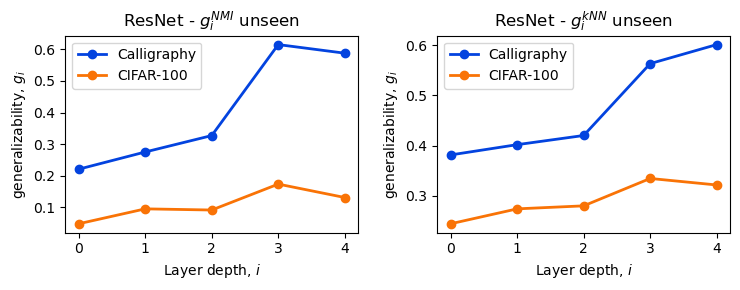

In [112]:
#plot data across layers for last step
metrics_to_show = ['NMI','NNk500']
datatype = 'unseen'
step_i = len(steps)-1 #last step
labels_dict = {'NMI':'$g_i^{NMI}$', 'NNk500':'$g_i^{kNN}$'}
colors_dict = {'Calligraphy':'xkcd:blue', 'CIFAR-100':'xkcd:orange'}



f, axes = plt.subplots(1,2,figsize=(10*.75,4*.75))
for ax, metric in zip(axes,metrics_to_show):
    for dataset in datasets:
        ax.plot(data_arrays[dataset][datatype][metric][step_i], lw=2, marker='o', markersize=6, 
                color=colors_dict[dataset], label=dataset)
    ax.set(xticks=range(data_arrays[dataset][datatype][metric].shape[1]))
    ax.set_xlabel('Layer depth, $i$')
    ax.set_ylabel('generalizability, $g_i$')
    ax.set_title(f'{modelname} - {labels_dict[metric]} {datatype}')

    ax.legend()
f.tight_layout()
plt.show()

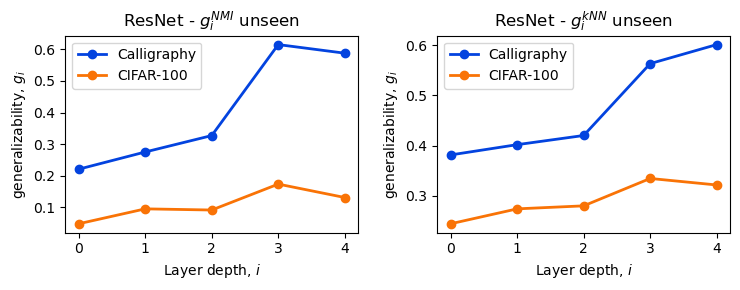

In [112]:
#plot data across layers for last step
metrics_to_show = ['NMI','NNk500']
datatype = 'unseen'
step_i = len(steps)-1 #last step
labels_dict = {'NMI':'$g_i^{NMI}$', 'NNk500':'$g_i^{kNN}$'}
colors_dict = {'Calligraphy':'xkcd:blue', 'CIFAR-100':'xkcd:orange'}



f, axes = plt.subplots(1,2,figsize=(10*.75,4*.75))
for ax, metric in zip(axes,metrics_to_show):
    for dataset in datasets:
        ax.plot(data_arrays[dataset][datatype][metric][step_i], lw=2, marker='o', markersize=6, 
                color=colors_dict[dataset], label=dataset)
    ax.set(xticks=range(data_arrays[dataset][datatype][metric].shape[1]))
    ax.set_xlabel('Layer depth, $i$')
    ax.set_ylabel('generalizability, $g_i$')
    ax.set_title(f'{modelname} - {labels_dict[metric]} {datatype}')

    ax.legend()
f.tight_layout()
plt.show()

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


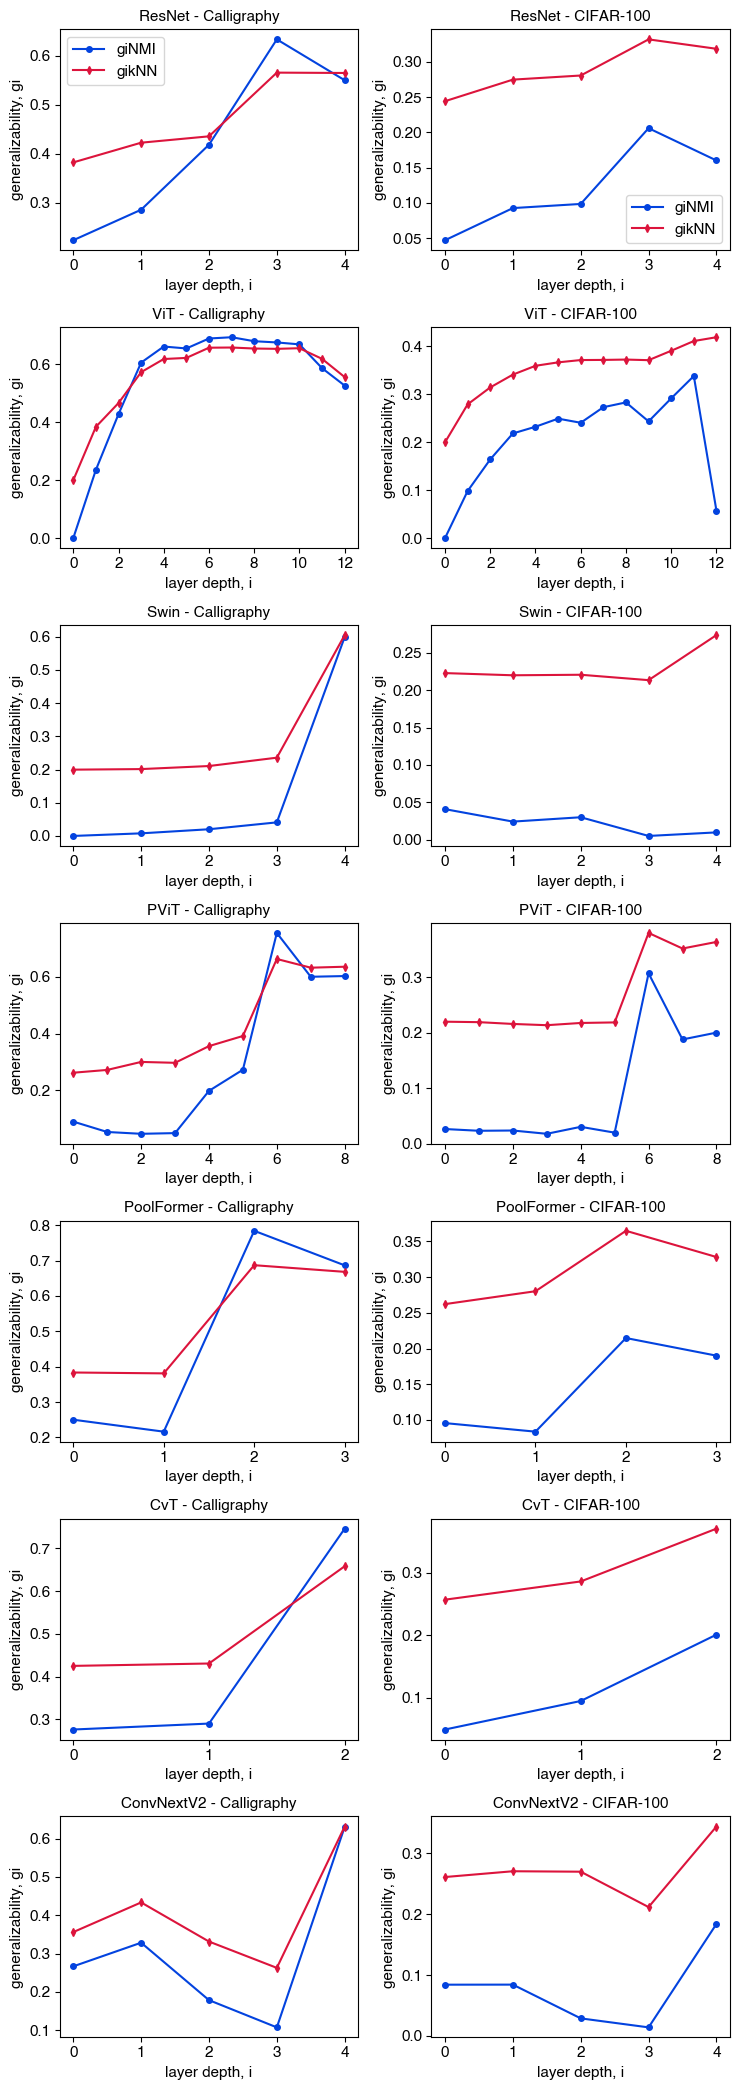

In [258]:
# COMPARING NMI and kNN across layers at end of fine-tuning (last step)

f, axes = plt.subplots(len(modelnames),2,figsize=(10*.75,len(modelnames)*4*.75))
for mi,modelname in enumerate(modelnames):

    
    metrics_to_show = ['NMI','NNk500']
    datatype = 'unseen'
    step_i = len(steps)-1 #last step
    labels_dict = {'NMI':'giNMI', 'NNk500':'gikNN', 'NNk1':'$g_i^{NN}$'}
    colors_dict = {'NMI':'xkcd:blue', 'NNk1':'xkcd:orange', 'NNk500':'crimson'}
    markers_dict = {'NMI':'o', 'NNk500':'d'}
    
    for ax, dataset in zip(axes[mi],datasets):

        for metric in metrics_to_show:
            ax.plot(data_arrays[modelname][dataset][datatype][metric][step_i], lw=1.5, marker=markers_dict[metric],
                    markersize=4, color=colors_dict[metric], label=labels_dict[metric])
        
        if modelname == 'ViT':
            ax.set_xticks(range(0,13,2))
        elif modelname == 'PViT':
            ax.set_xticks(range(0,9,2))
        else:
            ax.set(xticks=range(data_arrays[modelname][dataset][datatype][metric].shape[1]))
        ax.set_xlabel('layer depth, i',size=LBLSZ)
        ax.set_ylabel('generalizability, gi',size=LBLSZ)
        ax.set_title(f'{modelname} - {dataset}',size=LBLSZ)
        ax.tick_params(axis='both', which='major', labelsize=LBLSZ, pad=3)
        if mi == 0:
            ax.legend(**{'fontsize':LBLSZ})
f.tight_layout()
plt.savefig('metrics-fig.pdf', transparent=True, bbox_inches='tight')
plt.show()

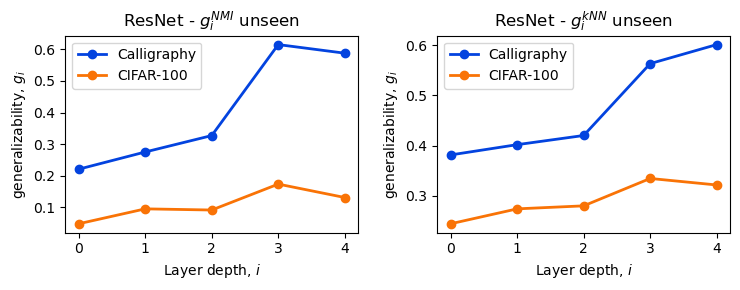

In [112]:
#plot data across layers for last step
metrics_to_show = ['NMI','NNk500']
datatype = 'unseen'
step_i = len(steps)-1 #last step
labels_dict = {'NMI':'$g_i^{NMI}$', 'NNk500':'$g_i^{kNN}$'}
colors_dict = {'Calligraphy':'xkcd:blue', 'CIFAR-100':'xkcd:orange'}



f, axes = plt.subplots(1,2,figsize=(10*.75,4*.75))
for ax, metric in zip(axes,metrics_to_show):
    for dataset in datasets:
        ax.plot(data_arrays[dataset][datatype][metric][step_i], lw=2, marker='o', markersize=6, 
                color=colors_dict[dataset], label=dataset)
    ax.set(xticks=range(data_arrays[dataset][datatype][metric].shape[1]))
    ax.set_xlabel('Layer depth, $i$')
    ax.set_ylabel('generalizability, $g_i$')
    ax.set_title(f'{modelname} - {labels_dict[metric]} {datatype}')

    ax.legend()
f.tight_layout()
plt.show()

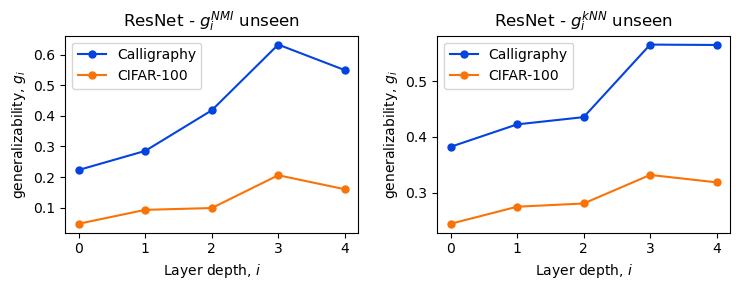

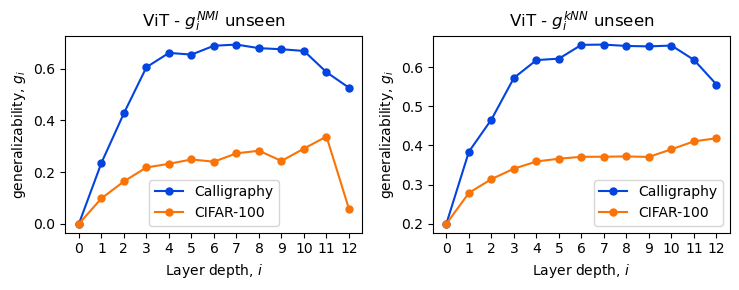

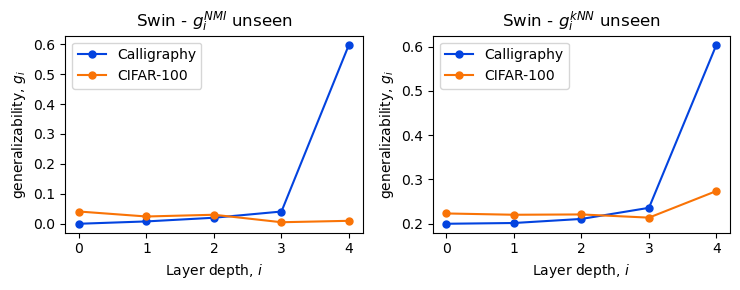

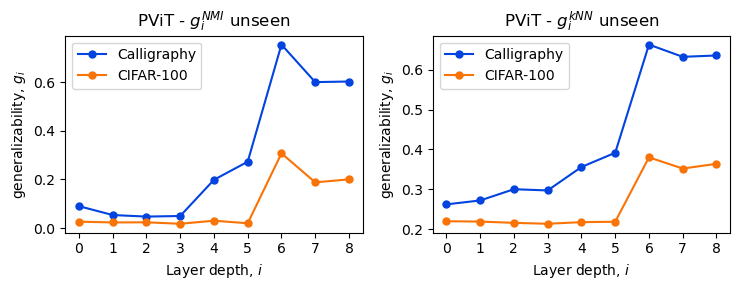

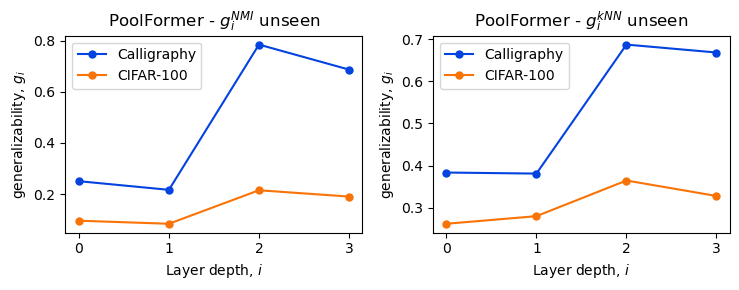

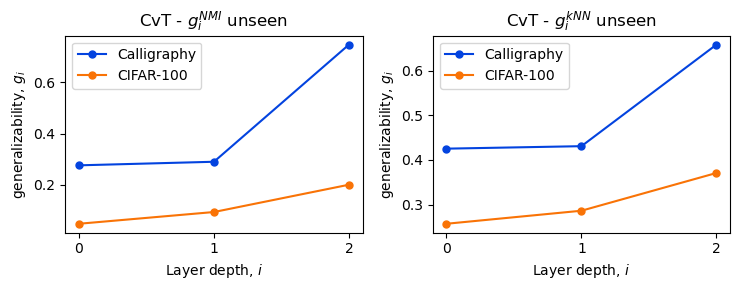

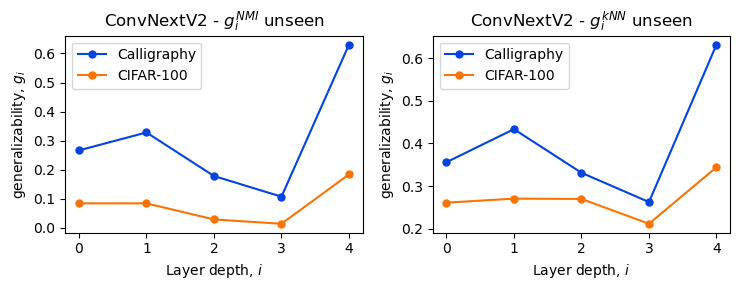

In [188]:
#  COMPARE NMI across layers for the two datasets
metrics_to_show = ['NMI','NNk500']
datatype = 'unseen'
step_i = len(steps)-1 #last step
labels_dict = {'NMI':'$g_i^{NMI}$', 'NNk500':'$g_i^{kNN}$'}
colors_dict = {'Calligraphy':'xkcd:blue', 'CIFAR-100':'xkcd:orange'}
for modelname in modelnames:
    f, axes = plt.subplots(1,2,figsize=(10*.75,4*.75))
    for ax, metric in zip(axes,metrics_to_show):
        for dataset in datasets:
            ax.plot(data_arrays[modelname][dataset][datatype][metric][step_i], lw=1.5, marker='o', markersize=5, 
                    color=colors_dict[dataset], label=dataset)
        ax.set(xticks=range(data_arrays[modelname][dataset][datatype][metric].shape[1]))
        ax.set_xlabel('Layer depth, $i$')
        ax.set_ylabel('generalizability, $g_i$')
        ax.set_title(f'{modelname} - {labels_dict[metric]} {datatype}')

        ax.legend()
    f.tight_layout()
    plt.show()

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


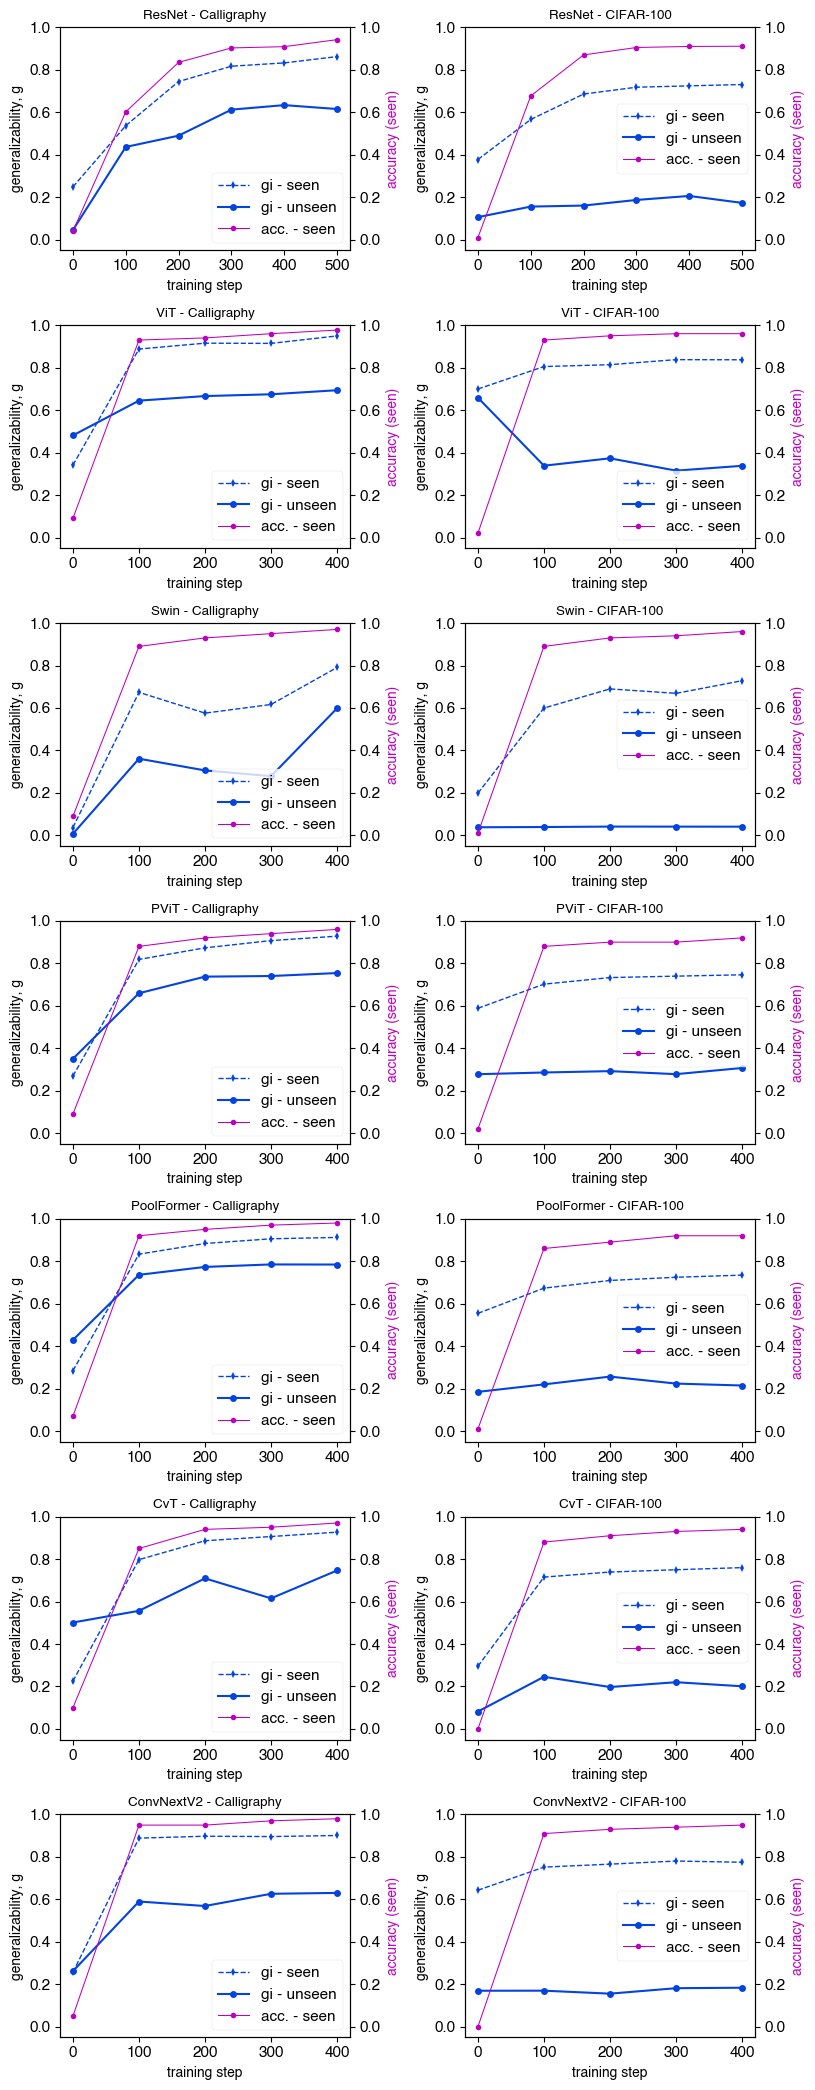

In [226]:

plt.rcParams["font.family"] = "helvetica"

metrics_to_show = ['NMI']
labels_dict = {'NMI':'gi', 'NNk500':'$g_i^{kNN}$', 'NNk1':'$g_i^{NN}$'}
colors_dict = {'NMI':'xkcd:blue', 'NNk500':'xkcd:orange', 'NNk1':'magenta'}
#plot max g_i across steps
LBLSZ = 11
with plt.style.context('seaborn-v0_8-paper'):
    f, axes = plt.subplots(len(modelnames),2,figsize=(2*5.5*.75,len(modelnames)*4*.75))
    for mi,modelname in enumerate(modelnames):
        steps = list(range(0,500+1,100)) if modelname == 'ResNet' else list(range(0,400+1,100))

        for ax,dataset in zip(axes[mi],datasets):


            for datatype,ls,lw,marker,ms in [('seen','--',1,'d',4),('unseen','-',1.5,'o',5)]:

                for metric in metrics_to_show:
                    vals = [max(data_arrays[modelname][dataset][datatype][metric][ii]) for ii in range(len(steps))]

                    ax.plot(vals, lw=lw, ls=ls, marker=marker, markersize=ms, color=colors_dict[metric], label=f'{labels_dict[metric]} - {datatype}')
            if dataset in accs[modelname]:
                ax_ = ax.twinx()
                ax.plot(accs[modelname][dataset][:len(steps)],'mo-', lw=.75, markersize=4, label='acc. - seen')
                ax_.set_ylabel('accuracy (seen)',color='m',size=10)
                ax_.tick_params(axis='y', which='major', labelsize=LBLSZ, pad=3)
        #         ax_.tick_params(axis='y', colors='red')
        #         ax_.set_yticks(ax.get_yticks(),ticklabelcolor='r')
                ax_.set(ylim=(-0.05,1))
            ax.set(xticks=range(data_arrays[modelname][dataset][datatype][metric].shape[0]), 
                   xticklabels=range(0,data_arrays[modelname][dataset][datatype][metric].shape[0]*100,100),
                   ylim=(-0.05,1))
            ax.set_xlabel('training step',size=10)
            ax.set_ylabel('generalizability, g',size=10)
            ax.set_title(f'{modelname} - {dataset}')
            ax.tick_params(axis='both', which='major', labelsize=LBLSZ, pad=3)
            ax.legend(**{'fontsize':LBLSZ})
            #ax_.legend(loc='upper left', **{'fontsize':8})
    f.tight_layout()
    plt.savefig('acc-gs-plot.pdf', transparent=True, bbox_inches='tight')
    plt.show()

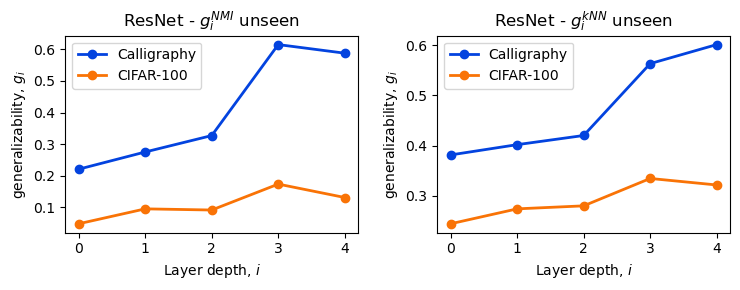

In [112]:
#plot data across layers for last step
metrics_to_show = ['NMI','NNk500']
datatype = 'unseen'
step_i = len(steps)-1 #last step
labels_dict = {'NMI':'$g_i^{NMI}$', 'NNk500':'$g_i^{kNN}$'}
colors_dict = {'Calligraphy':'xkcd:blue', 'CIFAR-100':'xkcd:orange'}



f, axes = plt.subplots(1,2,figsize=(10*.75,4*.75))
for ax, metric in zip(axes,metrics_to_show):
    for dataset in datasets:
        ax.plot(data_arrays[dataset][datatype][metric][step_i], lw=2, marker='o', markersize=6, 
                color=colors_dict[dataset], label=dataset)
    ax.set(xticks=range(data_arrays[dataset][datatype][metric].shape[1]))
    ax.set_xlabel('Layer depth, $i$')
    ax.set_ylabel('generalizability, $g_i$')
    ax.set_title(f'{modelname} - {labels_dict[metric]} {datatype}')

    ax.legend()
f.tight_layout()
plt.show()

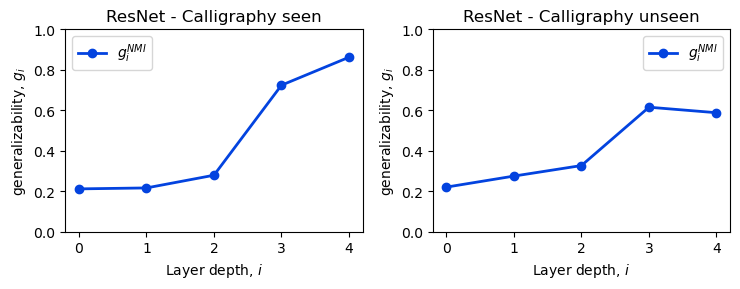

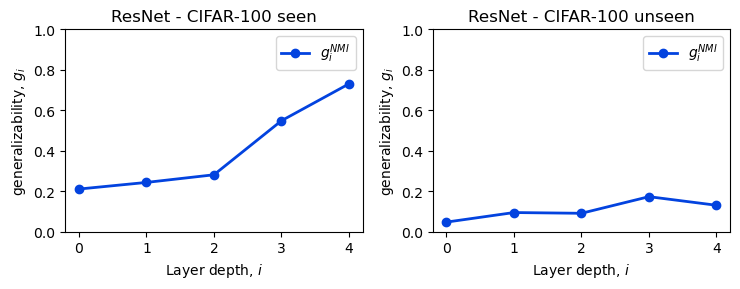

In [96]:
#plot data across layers for last step
metrics_to_show = ['NMI']#,'NNk500']
for dataset in datasets:
    f, axes = plt.subplots(1,2,figsize=(10*.75,4*.75))
    step_i = len(steps)-1 #last step
    labels_dict = {'NMI':'$g_i^{NMI}$', 'NNk500':'$g_i^{kNN}$', 'NNk1':'$g_i^{NN}$'}
    colors_dict = {'NMI':'xkcd:blue', 'NNk500':'xkcd:orange', 'NNk1':'magenta'}

    for ax, datatype in zip(axes,['seen','unseen']):

        for metric in metrics_to_show:
            ax.plot(data_arrays[dataset][datatype][metric][step_i], lw=2, marker='o', markersize=6, color=colors_dict[metric], label=labels_dict[metric])
        ax.set(xticks=range(data_arrays[dataset][datatype][metric].shape[1]), ylim=(0,1))
        ax.set_xlabel('Layer depth, $i$')
        ax.set_ylabel('generalizability, $g_i$')
        ax.set_title(f'{modelname} - {dataset} {datatype}')

        ax.legend()
    f.tight_layout()
    plt.show()

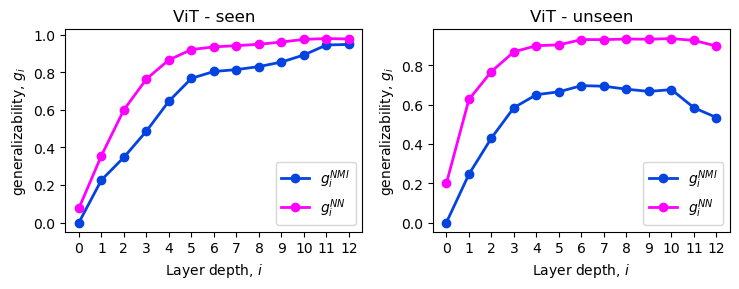

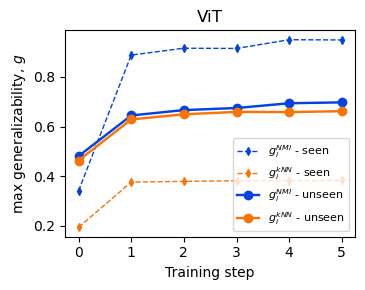

In [76]:
modelname = 'ViT'
steps = list(range(0,500+1,100))

#isCNN = True
metrics = ['NMI', 'NNk1', 'NNk500']
data_arrays = {}

for datatype in ['seen','unseen']:
    data_arrays[datatype] = {}
    for step in steps:

        with open(f'{folder}/{modelname}Calligraphy/saved_embeds_step{step}_{datatype}.pkl','rb') as f:
            data = pickle.load(f)

        methd = list(data.keys())[0]


        for metric in metrics:
            layer_data = np.array([data[methd][layer_i][metric] for layer_i in data[methd]])
            if step == 0:
                data_arrays[datatype][metric] = layer_data[None,:]
            else:
                #concatenate 
                data_arrays[datatype][metric] = np.concatenate([data_arrays[datatype][metric], layer_data[None,:]],axis=0)

#plot data across layers for last step
f, axes = plt.subplots(1,2,figsize=(10*.75,4*.75))
step_i = len(steps)-1 #last step
labels_dict = {'NMI':'$g_i^{NMI}$', 'NNk500':'$g_i^{kNN}$', 'NNk1':'$g_i^{NN}$'}
colors_dict = {'NMI':'xkcd:blue', 'NNk500':'xkcd:orange', 'NNk1':'magenta'}

for ax, datatype in zip(axes,['seen','unseen']):

    for metric in ['NMI','NNk1']:
        ax.plot(data_arrays[datatype][metric][step_i], lw=2, marker='o', markersize=6, color=colors_dict[metric], label=labels_dict[metric])
    ax.set(xticks=range(data_arrays[datatype][metric].shape[1]))
    ax.set_xlabel('Layer depth, $i$')
    ax.set_ylabel('generalizability, $g_i$')
    ax.set_title(f'{modelname} - {datatype}')
    ax.legend()
f.tight_layout()
plt.show()

#plot max g_i across steps
f, ax = plt.subplots(1,1,figsize=(5*.75,4*.75))

for datatype,ls,lw,marker,ms in [('seen','--',1,'d',4),('unseen','-',1.75,'o',6)]:
    
    for metric in ['NMI','NNk500']:
        vals = [max(data_arrays[datatype][metric][ii]) for ii in range(len(steps))]
        
        ax.plot(vals, lw=lw, ls=ls, marker=marker, markersize=ms, color=colors_dict[metric], label=f'{labels_dict[metric]} - {datatype}')
ax.set(xticks=range(data_arrays[datatype][metric].shape[0]))
ax.set_xlabel('Training step')
ax.set_ylabel('max generalizability, $g$')
ax.set_title(modelname)
ax.legend(loc='lower right', **{'fontsize':8})
f.tight_layout()
plt.show()